In [85]:
## This program was developed to determine the intensity of a electron beam on a HAADF detector when the electron
## beam passes through a wedge shaped material (1nm - 3 microns). The thickness ranges from one nm to few microns.
## The program calculates elastic scattering from an electron beam per nm of the sample and also the absorption using
## scattering coefficients, density, atomic number, absorption parameters and HAADF scattering angle and detector 
## parameters.
## This program was named Modified Multi Slice simulation 
## @Aniruddha Dutta, 2014


import numpy as np
from numpy import *
import matplotlib.pyplot as plt
plt.ion()

In [86]:
exec(open("/Users/Devil/pythonprograms/scatteringcoefficients.py").read())
exec(open("/Users/Devil/pythonprograms/density.py").read())

In [87]:
#print "This program uses a centered Intensity distribution: incident beam is centered 
#print  in the field of the diffraction and image plane" and a corner center fb distribution \n"

t = int(input("Please enter the thickness of the sample slice in nm:"))  #thickness of sample slice in nanometer
t = t*1E-9      # slice thickness in meter
print(t)
total_thickness = float(input("Please enter the total thickness of the sample in microns :")) # total thickness of the sample in microns
tend = float(total_thickness*1E-6/t)  #total number of thickness steps
print("Thickness steps=",tend)
absorb = 0.0005    # absorption parameter
dtheta = 0.002
v = 300000         #voltage
q = 1.602E-19     # charge of electron
h = 6.62E-34      #plancks constannt
m = 9.1E-31        # mass of electron
c = 3E8            #speed of light
gamma = 1+ (q*v/(m*c**2))       #relativistic correction
print ("Gamma =",gamma) 
fbprefactor = 2*pi*gamma*m*q/(h**2)
print ("fb pre-factor =" ,fbprefactor)
lamda = h/(sqrt(2*m*q*v*(1+(q*v)/(2*m*c**2))))      #wavelength with relativistic correction

Please enter the thickness of the sample slice in nm:10
1e-08
Please enter the total thickness of the sample in microns :3
Thickness steps= 300.0
Gamma = 1.586813186813187
fb pre-factor = 3.3166038035603113e+18


In [88]:
# HAADF detector parameters
semiconv=0.0010          #define beam convergence
mindetrange=0.052        #min HAADF scattering range
maxdetrange=0.255        # max HAADF scattering range
sconv=semiconv/dtheta
mindet=mindetrange/dtheta
maxdet=maxdetrange/dtheta
thetamin =0.0
thetamax = 3.141
bigstep=1
n=512
domega=2*sin(dtheta*n/2)/n
epsilonabs=0.01

In [89]:
atomic_number=int(input("Please enter the atomic number of the element :"))
print ("The atomic number of the element is :",atomic_number)
coeff=scatcoeff[atomic_number-1]   # scattering coeffient
scatcoeff[atomic_number-1][0]==density[atomic_number-1][1]
print ("Density of the material is :",density[atomic_number-1][1])
rho=density[atomic_number-1][1]
print ("Scattering coefficient =", coeff)
fbtotal=0
import timeit   #timer program
start = timeit.default_timer()  #timer starts

Please enter the atomic number of the element :79
The atomic number of the element is : 79
Density of the material is : 5.9016e+28
Scattering coefficient = [  7.90000000e+01   3.05500000e-01   1.39450000e+00   2.96170000e+00
   3.89900000e+00   2.00260000e+00   5.96000000e-02   5.82700000e-01
   3.10350000e+00   1.19693000e+01   4.79106000e+01]


In [90]:
scatter =np.zeros((n,n))
omega=np.zeros((n,n))
SF2total=0          # Elastic scattering
SF2Imtotal=0        # Absorptive scattering
fb2total=0           # Total scattering

In [91]:
#print Array

center=n//2
print ("center=",center)
for x in arange(0,center+1,1):   # determining position 
    for y in arange(0,center+1,1):
        omega[x,y]=round((sqrt((x)**2+(y)**2)),2)*domega
    for y in arange (center+1,n,1):
        ypos=n-y
        omega[x,y]=round((sqrt((x)**2+(ypos)**2)),2)*domega
for x in arange(center+1,n,1):
    xpos=n-x
    for y in arange(0,center+1,1):
        omega[x,y]=round((sqrt((xpos)**2+(y)**2)),2)*domega
    for y in arange (center+1,n,1):
        ypos=n-y
        omega[x,y]=round((sqrt((xpos)**2+(ypos)**2)),2)*domega       

center= 256


In [92]:
for x in arange(0,n,1):
    for y in arange(0,n,1):
        sintheta=sqrt(0.5)*sqrt(1.-sqrt(1.-omega[x,y]**2))
        s2=sintheta/lamda
        for i in arange(1,6,1):
            SF2=coeff[i]*(e**(-coeff[i+5]*10**(-20)*s2**2))           # for intensity
            SF2total = SF2total + SF2
            #SF2Im=matrixIm[i]*(e**(-matrixIm[i+5]*10**(-20)*s2**2))   # for absorption
            #SF2Imtotal=SF2Imtotal + SF2Im                             # total absorption
        fe2= 0.04787E-27*SF2total        #test/2.
        #fe2Im=0.04787E-27*SF2Imtotal
        scatter[x,y]=fe2*fe2     #q in the equation in copy
        #fb2total=fb2total+fe2*fe2   
        SF2total=0
        #SF2Imtotal=0
        #print "fb2total=", fb2total

In [93]:
##----------------------------array of fb2------------------------------------

#print "Array of fb values:\n \n",array[x,y]
        
scatter=scatter*rho*t*fbprefactor**2*domega**2     
scatter[0,0]=0                        #scattering at the center is zero
sumscatter=np.sum(scatter)
#fb2total=fb2total*rho*t*fbprefactor**2*domega**2 #total scattering
print ("sum of Array is: ",sumscatter)
abspar=1.-sumscatter*absorb
print ("absorption ", absorb)

sum of Array is:  0.855872012101
absorption  0.0005


In [94]:
##----------------------------Finding sum of array-----------
#sumI2=coeff[1]+coeff[2]+coeff[3]+coeff[4]+coeff[5]
#sumI2=(sumI2*0.04787E-27)**2*rho*t*fbprefactor**2*domega**2

#fb2total=fb2total-sumI2            
#fb2total=fb2total*(1.+epsilonabs)         
#sumI2=matrixIm[1]+matrixIm[2]+matrixIm[3]+matrixIm[4]+matrixIm[5]
#sumI2=(sumI2*0.04787E-27)**2*rho*t*fbprefactor**2*domega**2

#print "value real,1-absorption of 0,0 ", fb2total, sumI2
#fb2total=fb2total+sumI2
#----------------------------Initialize I0-----------------------


#print "\n----------------------Initialize I0 initial beam--------------------------\n"
fscatter=np.zeros((n,n))     #fourier of scatter
Itarray =np.zeros((n,n))     #initial beam
Iftarray=np.zeros((n,n))
detarray =np.zeros((n,n))
fresnel=np.zeros((n,n))    # fresnel propagator 
Itfresnel=np.zeros((n,n))
print ("\n Arrays defined")
#print I0array
#print "\nCenter of array is:",center
#the beam convergence is 5mrad for 2theta

counter =0
for x in arange(0,n,1):
    xpos=abs(x-center)
    for y in arange(0,n,1):
        ypos=abs(y-center)
        distval=round((sqrt((xpos)**2+(ypos)**2)),2)
        fresnel[x,y]=1/sqrt(1.-omega[xpos,ypos]**2)      # Fresnel propagator
        if sconv>distval:
            counter= counter+1
            Itarray[x,y]=1
        if maxdet>distval and mindet<=distval:
            detarray[x,y]=1


 Arrays defined


In [95]:
Itarray=Itarray/counter
#print "\nCounter counts no. of entries into I0 array:",counter

Intensity=np.sum(Itarray*detarray)
print ("\nIntensity is: ",Intensity, " 0 \n ")
print ("counter = ", counter)
#print "\nNormalized Array of I0 is:\n "
#print Itarray initial

fscatter=np.fft.fft2(scatter)     #FFT of scatter
yval=[]
xval=[]

print ("\n", np.sum(scatter),np.sum(fscatter),np.sum(fresnel),np.sum(Itarray))


Intensity is:  0.0  0 
 
counter =  1

 0.855872012101 (2.27373675443e-13+2.01948391737e-28j) 287704.094173 1.0


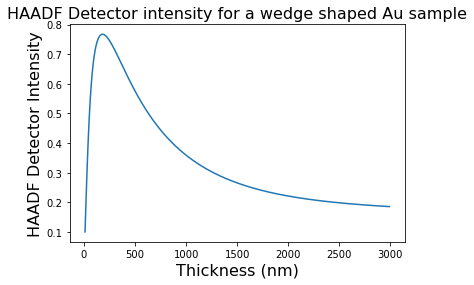

In [96]:
import time
import os
os.chdir("/Users/Devil/pythonprograms/")
f= open("Au_absorption_2mic_10nm_absorp.txt", "w")   # opening file to write

#print scatter(0,0), Intensity.real

intreal = []
thickness = []

for tstep in arange (1,tend,1):
    #plt.clf()
    Itfresnel=fresnel*Itarray     # Fresnel propagator times intensity array
    Iftarray=np.fft.fft2(Itfresnel)
    Iftarray=Iftarray*fscatter
    #print "\n ",np.sum(Iftarray),np.sum(fscatter)
    Itarray = (Itarray-Itfresnel*sumscatter+np.fft.ifft2(Iftarray))*abspar
    Intensity = np.sum(Itarray*detarray)
    thick = tstep*t*10**9                   # increasing thickness in nm
    #print (thick, "\t", Intensity.real)
    intreal.append(Intensity.real)
    thickness.append(thick)
    f.write(str(thick) + '\t' + str(Intensity.real) + '\n')
    
f.close()
plt.title('HAADF Detector intensity for a wedge shaped Au sample', fontsize=16)
plt.xlabel('Thickness (nm)', fontsize=16)
plt.ylabel('HAADF Detector Intensity', fontsize=16)
plt.plot(thickness,intreal)
stop = timeit.default_timer()   # timer stops